# Case-1: Customer-Churn Prediction

#### **Task 1: Data Loading and Exploration**

In [2]:
import pandas as pd
import numpy as np
data_path = '/Users/hafizmohammedaahil/Documents/University-Related-Stuff/SEM-5/Lab/Machine-Learning/ML_LAB1_Assignment/customer_churn_data.csv'
df_1=pd.read_csv(data_path)
print("Shape of the dataset is:",df_1.shape)
df_1.head(10)

Shape of the dataset is: (10000, 24)


,customer_id,age,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service,...,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,customer_satisfaction,support_calls,churn
0,CUST_000001,52,Male,0,Yes,Yes,7,Yes,No,Fiber optic,...,Yes,No,One year,Yes,Electronic check,39.18,294.66,4,3,No
1,CUST_000002,42,Male,0,Yes,No,32,Yes,No,No,...,No internet service,No internet service,One year,Yes,Electronic check,40.36,1286.75,3,1,No
2,CUST_000003,54,Male,0,No,Yes,12,Yes,Yes,Fiber optic,...,Yes,Yes,Month-to-month,No,Bank transfer (automatic),84.77,947.09,2,3,Yes
3,CUST_000004,67,Male,1,No,No,3,Yes,No,DSL,...,No,No,One year,No,Credit card (automatic),54.14,172.76,4,5,No
4,CUST_000005,41,Female,0,Yes,No,7,Yes,No,Fiber optic,...,No,No,Month-to-month,Yes,Electronic check,71.77,466.98,3,3,No
5,CUST_000006,41,Male,0,No,Yes,26,Yes,No,No,...,No internet service,No internet service,Two year,No,Electronic check,23.08,585.11,4,1,No
6,CUST_000007,68,Male,1,Yes,No,9,Yes,Yes,No,...,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),42.87,371.67,3,1,No
7,CUST_000008,56,Female,0,Yes,No,22,Yes,No,DSL,...,No,Yes,One year,Yes,Electronic check,61.15,1352.62,5,1,No
8,CUST_000009,37,Male,0,Yes,Yes,5,Yes,No,Fiber optic,...,No,No,Month-to-month,No,Bank transfer (automatic),47.17,252.11,3,1,No
9,CUST_000010,53,Female,0,Yes,No,14,Yes,No,Fiber optic,...,No,No,Two year,No,Mailed check,49.69,636.29,5,2,Yes


In [ ]:
df_1.info()
print("The data with missing values:")
print(df_1.isnull().sum())
df_1.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   customer_id            10000 non-null  object 
 1   age                    10000 non-null  int64  
 2   gender                 10000 non-null  object 
 3   senior_citizen         10000 non-null  int64  
 4   partner                10000 non-null  object 
 5   dependents             10000 non-null  object 
 6   tenure                 10000 non-null  int64  
 7   phone_service          10000 non-null  object 
 8   multiple_lines         10000 non-null  object 
 9   internet_service       10000 non-null  object 
 10  online_security        10000 non-null  object 
 11  online_backup          10000 non-null  object 
 12  device_protection      10000 non-null  object 
 13  tech_support           10000 non-null  object 
 14  streaming_tv           10000 non-null  object 
 15  str

#### **Task 2: Exploratory Data Analysis**

##### **Churn Rate**

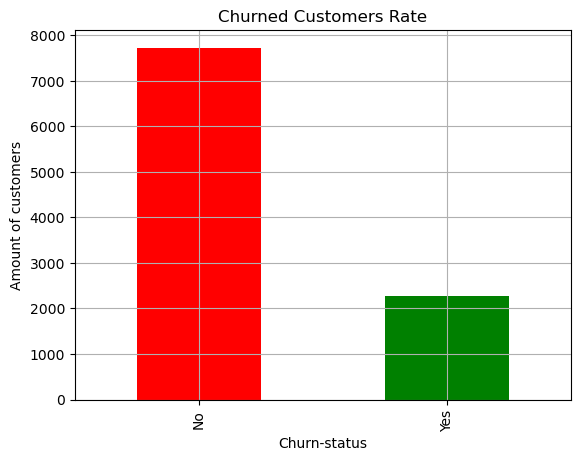

Churn percentage:
churn
No     77.28
Yes    22.72
Name: proportion, dtype: float64


In [ ]:
import matplotlib.pyplot as plt

# just checking how many people churned vs not
df_1['churn'].value_counts().plot(kind='bar', color=['red', 'green'])
plt.title("Churned Customers Rate")
plt.xlabel("Churn-status")
plt.ylabel("Amount of customers")
plt.grid(True)
plt.show()

# now checking churn rate in %
churn_percent = df_1['churn'].value_counts(normalize=True) * 100 #normalize=True meaning that it is calculating in percentage pre-hand!!
print("Churn percentage:")
print(churn_percent)


##### **Churn Rate for Age and Gender Demographic**

Gender Demographics Churn Rate:
gender  churn
Female  No       0.778004
        Yes      0.221996
Male    No       0.767780
        Yes      0.232220
Name: proportion, dtype: float64

Age & Senior Citizen Demographics Churn Rate:
senior_citizen  churn
0               No       0.776358
                Yes      0.223642
1               No       0.737811
                Yes      0.262189
Name: proportion, dtype: float64


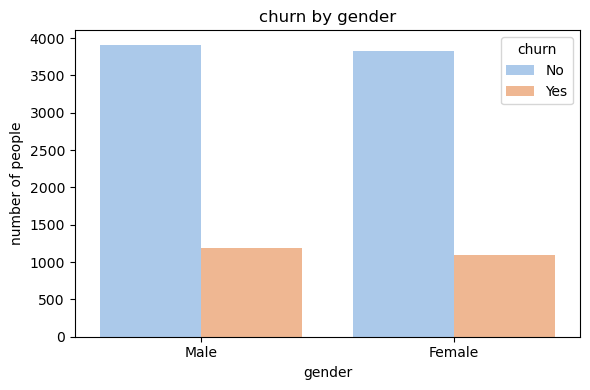

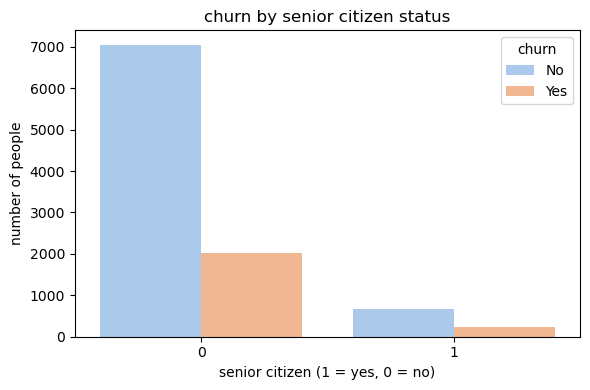

In [14]:
import seaborn as sns
# Gender Demographics
print("Gender Demographics Churn Rate:")
print(df_1.groupby('gender')['churn'].value_counts(normalize=True))  #normalize=True meaning that it is calculating in percentage pre-hand!!

# Age Demographics (especially Senior-Citizens)
print("\nAge & Senior Citizen Demographics Churn Rate:")
print(df_1.groupby('senior_citizen')['churn'].value_counts(normalize=True))

#Gender Demographics
plt.figure(figsize=(6, 4))
sns.countplot(data=df_1, x='gender', hue='churn', palette='pastel')
plt.title("churn by gender")
plt.ylabel("number of people")
plt.xlabel("gender")
plt.tight_layout()
plt.show()

#Age Demographics (especially Senior-Citizens)
plt.figure(figsize=(6, 4))
sns.countplot(data=df_1, x='senior_citizen', hue='churn', palette='pastel')
plt.title("churn by senior citizen status")
plt.xlabel("senior citizen (1 = yes, 0 = no)")
plt.ylabel("number of people")
plt.tight_layout()
plt.show()



##### **Investigate financial factors and payment method effects**

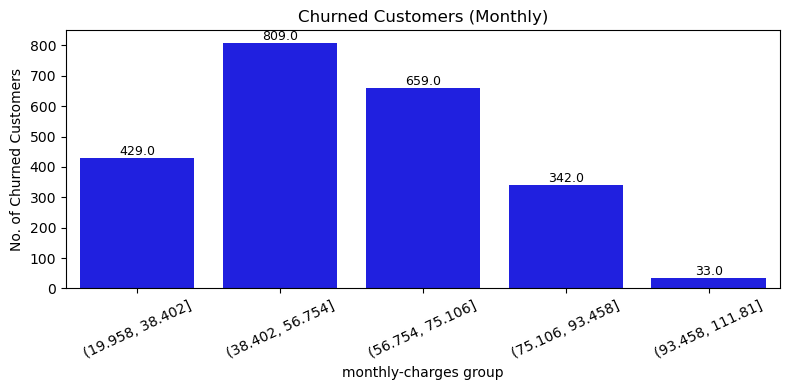

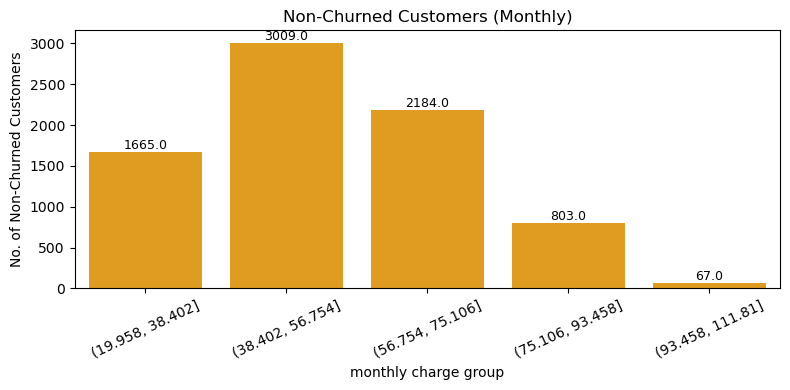

In [18]:
import seaborn as sns
# only people who churned
churned = df_1[df_1['churn'] == 'Yes']

plt.figure(figsize=(8, 4))
ax = sns.countplot(data=churned, x='monthly_charge_bin', color='blue')
plt.title("Churned Customers (Monthly)")
plt.xticks(rotation=25)
plt.ylabel("No. of Churned Customers")
plt.xlabel("monthly-charges group")

# add count on top of bars
for bar in ax.patches:
    height = bar.get_height()
    ax.annotate(f'{height}', (bar.get_x() + bar.get_width()/2, height),
                ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


# only people who stayed
stayed = df_1[df_1['churn'] == 'No']

plt.figure(figsize=(8, 4))
ax = sns.countplot(data=stayed, x='monthly_charge_bin', color='orange')
plt.title("Non-Churned Customers (Monthly)")
plt.xticks(rotation=25)
plt.ylabel("No. of Non-Churned Customers")
plt.xlabel("monthly charge group")

# add count on top of bars
for bar in ax.patches:
    height = bar.get_height()
    ax.annotate(f'{height}', (bar.get_x() + bar.get_width()/2, height),
                ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


##### **Create correlation analysis for numerical features**

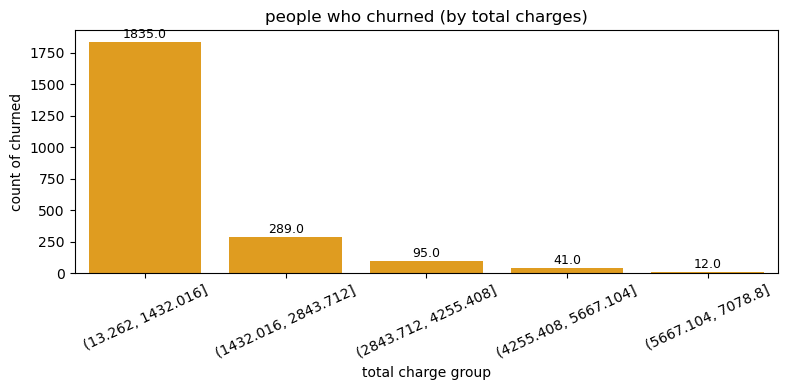

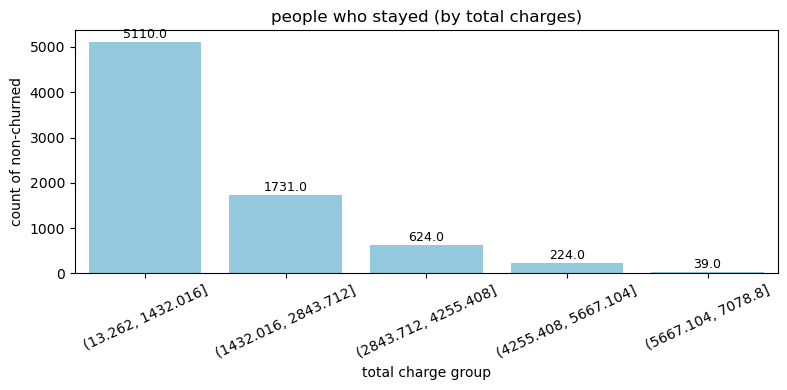

In [17]:
# breaking total charges into 5 groups
df_1['total_charge_bin'] = pd.cut(df_1['total_charges'], bins=5)
# churned people only
churned = df_1[df_1['churn'] == 'Yes']

plt.figure(figsize=(8, 4))
ax = sns.countplot(data=churned, x='total_charge_bin', color='orange')
plt.title("people who churned (by total charges)")
plt.xticks(rotation=25)
plt.ylabel("count of churned")
plt.xlabel("total charge group")

# adding count on top of each bar
for bar in ax.patches:
    height = bar.get_height()
    ax.annotate(f'{height}', xy=(bar.get_x() + bar.get_width()/2, height),
                xytext=(0, 3), textcoords='offset points', ha='center', fontsize=9)

plt.tight_layout()
plt.show()


# non-churned people
stayed = df_1[df_1['churn'] == 'No']

plt.figure(figsize=(8, 4))
ax = sns.countplot(data=stayed, x='total_charge_bin', color='skyblue')
plt.title("people who stayed (by total charges)")
plt.xticks(rotation=25)
plt.ylabel("count of non-churned")
plt.xlabel("total charge group")

# adding count on top of each bar
for bar in ax.patches:
    height = bar.get_height()
    ax.annotate(f'{height}', xy=(bar.get_x() + bar.get_width()/2, height),
                xytext=(0, 3), textcoords='offset points', ha='center', fontsize=9)

plt.tight_layout()
plt.show()


##### **Create correlation analysis for numerical features**

Correlation table for key features:
                   tenure  monthly_charges  total_charges
tenure           1.000000        -0.002129       0.899546
monthly_charges -0.002129         1.000000       0.317016
total_charges    0.899546         0.317016       1.000000


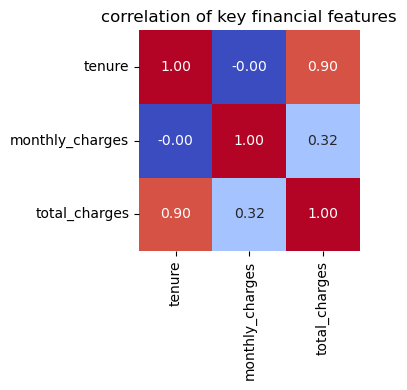

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# checking how key financial features are related
important = ['tenure', 'monthly_charges', 'total_charges']

# print correlation values directly (feels handwritten)
print("Correlation table for key features:")
print(df_1[important].corr())

# simple heatmap (not overdone)
plt.figure(figsize=(6, 4))
sns.heatmap(df_1[important].corr(), annot=True, cmap='coolwarm', fmt='.2f', square=True, cbar=False)
plt.title("correlation of key financial features")
plt.tight_layout()
plt.show()

# tenure and total_charges are highly correlated (0.90) (this is makes sense because as the tenure increases, total charges also increase)
# monthly_charges and total_charges have some correlation (0.32), possible, since someone could pay a lot monthly but stay for a short time
# tenure and monthly_charges are basically uncorrelated, this means how long someone stays isn’t directly tied to how much they pay per month

#### **Task 3: Data Preprocessing**

##### **Encode categorical variables and scale numerical features**

In [28]:
from sklearn.preprocessing import StandardScaler

cat_cols = df_1.select_dtypes(include='object').columns
num_cols = df_1.select_dtypes(include=['int64', 'float64']).columns

df_encoded = pd.get_dummies(df_1, columns=cat_cols, drop_first=True)

# scale only true numeric features (not binary ones like 'senior_citizen')
cols_to_scale = [col for col in num_cols if col != 'senior_citizen']

scaler = StandardScaler()
df_encoded[cols_to_scale] = scaler.fit_transform(df_encoded[cols_to_scale])

##### **Split data**

In [30]:
from sklearn.model_selection import train_test_split

# define feature matrix X and target y
X = df_encoded.drop('churn_Yes', axis=1)
y = df_encoded['churn_Yes']

#80-20 split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
# splitting data before training models
# using churn_Yes as target because we applied get_dummies

#### **Task 4: Model Development**

##### **First Algorithm:Logistic Regression**

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_logreg = log_reg.predict(X_test)

##### **Second Algorithm: Decision Tree**

In [36]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)

##### **Third Algorithm: Random Forest**

In [37]:
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

##### **Fourth Algorithm: Support Vector Machine(SVM)**

In [38]:
svm_clf = SVC()
svm_clf.fit(X_train, y_train)
y_pred_svm = svm_clf.predict(X_test)

#### **Task 5: Model Evaluation**

##### **Import All Evaluation Tools**

In [39]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

##### **Define Evaluation Function**

In [40]:
def evaluate_model(y_true, y_pred, model_name):
    print(f"--- {model_name} ---")
    print("Accuracy :", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall   :", recall_score(y_true, y_pred))
    print("F1 Score :", f1_score(y_true, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))
    
    # confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{model_name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

##### **Evaluate All Models One by One**

--- Logistic Regression ---
Accuracy : 0.7835
Precision: 0.5963855421686747
Recall   : 0.2129032258064516
F1 Score : 0.31378763866877973

Classification Report:
              precision    recall  f1-score   support

       False       0.80      0.96      0.87      1535
        True       0.60      0.21      0.31       465

    accuracy                           0.78      2000
   macro avg       0.70      0.58      0.59      2000
weighted avg       0.75      0.78      0.74      2000



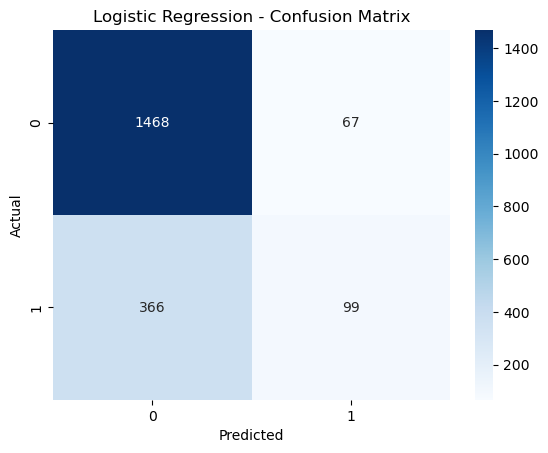

--- Decision Tree ---
Accuracy : 0.6915
Precision: 0.34232365145228216
Recall   : 0.3548387096774194
F1 Score : 0.3484688489968321

Classification Report:
              precision    recall  f1-score   support

       False       0.80      0.79      0.80      1535
        True       0.34      0.35      0.35       465

    accuracy                           0.69      2000
   macro avg       0.57      0.57      0.57      2000
weighted avg       0.70      0.69      0.69      2000



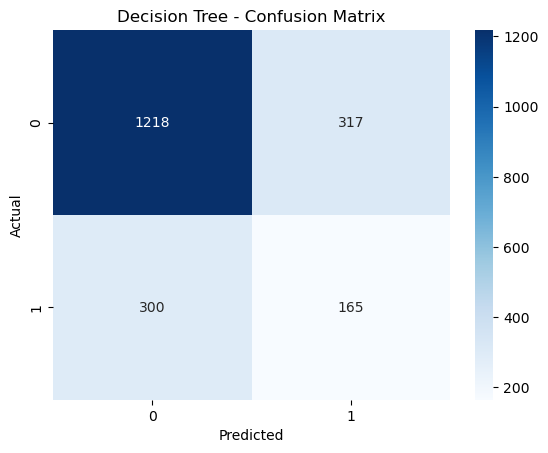

--- Random Forest ---
Accuracy : 0.788
Precision: 0.6227544910179641
Recall   : 0.22365591397849463
F1 Score : 0.3291139240506329

Classification Report:
              precision    recall  f1-score   support

       False       0.80      0.96      0.87      1535
        True       0.62      0.22      0.33       465

    accuracy                           0.79      2000
   macro avg       0.71      0.59      0.60      2000
weighted avg       0.76      0.79      0.75      2000



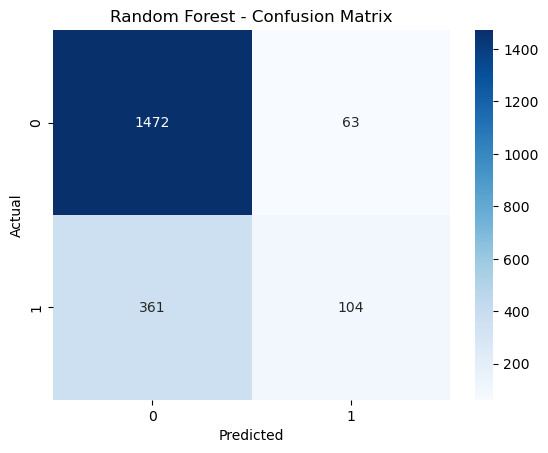

--- Support Vector Machine ---
Accuracy : 0.7805
Precision: 0.6140350877192983
Recall   : 0.15053763440860216
F1 Score : 0.24179620034542315

Classification Report:
              precision    recall  f1-score   support

       False       0.79      0.97      0.87      1535
        True       0.61      0.15      0.24       465

    accuracy                           0.78      2000
   macro avg       0.70      0.56      0.56      2000
weighted avg       0.75      0.78      0.73      2000



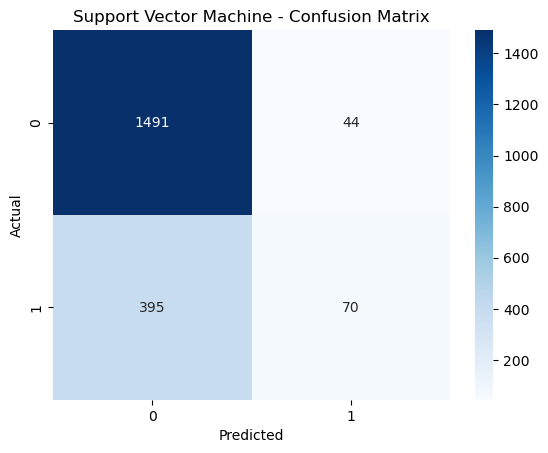

In [41]:
evaluate_model(y_test, y_pred_logreg, "Logistic Regression")
evaluate_model(y_test, y_pred_tree, "Decision Tree")
evaluate_model(y_test, y_pred_rf, "Random Forest")
evaluate_model(y_test, y_pred_svm, "Support Vector Machine")

### **Final Model Selection**
#### Evaluation of the model is done on the basis of the following metrics:
#### 1. Accuracy
#### 2. Precision
#### 3. Recall
#### 4. F1 Score
#### 5. Confusion Matrix

#### The model that gave the most balanced results is **Random Forest**, Although SVM and Logisistic Regression have better and slightly higher accuracy.